In [1]:
import numpy as np
from lib import calc

%load_ext autoreload
%autoreload 2

In [2]:
# PARAMS TUNED FOR GOBILDA 5203 SERIES 1150 RPM
dcVoltage    = 12     # [V]
stallCurrent = 9.2     # [A]
stallTorque  = 0.7747253500000001    # [N*m]
unloadedRPM  = 19300  # [min^-1]

# Convert unloaded speed from RPM to rad/s
unloadedSpeed = 2.0*np.pi*unloadedRPM/60.0

# Calculate the winding resistance from the stall current
R = dcVoltage/stallCurrent

# Calculate the motor constant
k = stallTorque/stallCurrent

# Calculate the friction
mu = k*(dcVoltage-k*unloadedSpeed)/(R*unloadedSpeed)

# Show the results
calc.printVar("R",R,"Ohms")
calc.printVar("k",k,"N*m / A")
calc.printVar("mu",mu,"N*m / rad/s")

R = 1.304 Ohms
k = 84.209 mN*m / A
mu = -5.053 mN*m / rad/s


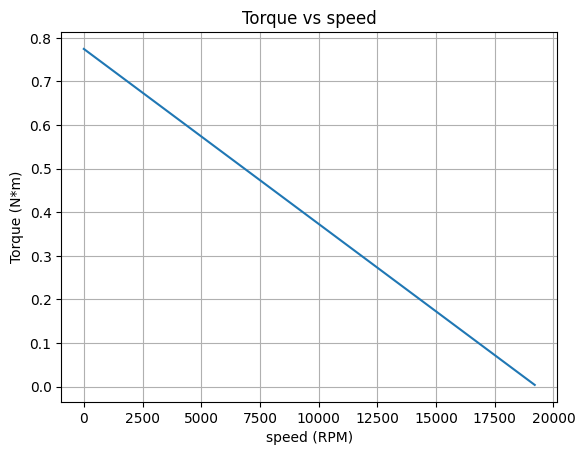

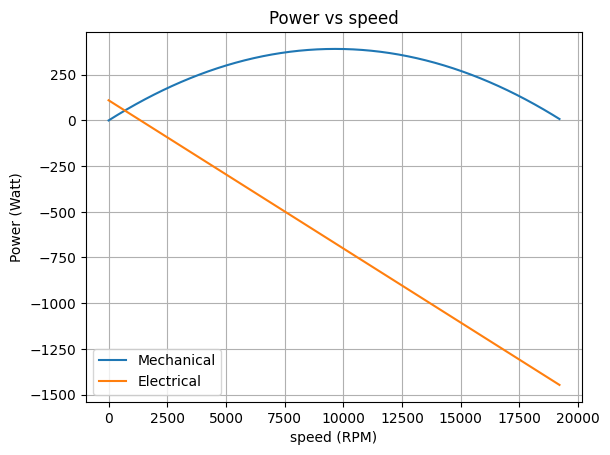

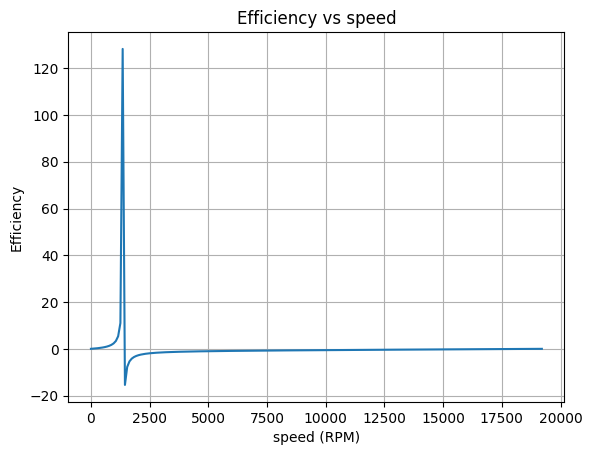

In [3]:
# We define a vector for the speeds to calculate
vRPM = np.arange(0, unloadedRPM, unloadedRPM / 200.0)

# We obtain the speed vector in rad/s
vRad = 2.0 * np.pi * vRPM / 60.0

# We calculate the torque at each speed
vT = (k / R) * (dcVoltage - k * vRad) - mu * vRad

calc.setColaboratory(False)

# And we show that on a graph
calc.plot11(vRPM, vT, "Torque vs speed", "speed (RPM)", "Torque (N*m)")

# We can also show the mechanical power and the input electrical power
vPout = vT * vRad
vPin = dcVoltage * (dcVoltage - k * vRad) / R
calc.plot1n(
    vRPM,
    [vPout, vPin],
    "Power vs speed",
    "speed (RPM)",
    "Power (Watt)",
    ["Mechanical", "Electrical"],
)

# We can also show the efficiency of the motor
vEff = vPout / vPin
calc.plot11(vRPM, vEff, "Efficiency vs speed", "speed (RPM)", "Efficiency")


Time constant = 183.939 ms


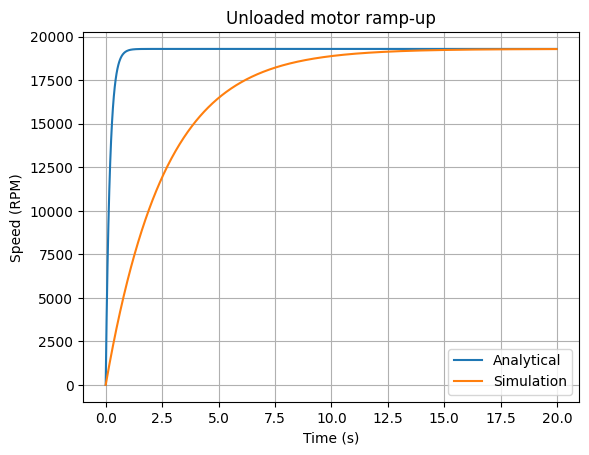

In [4]:
# Inertial momentum
J = 1e-3  # [kg*m^2]

# Time to solve for
tEnd = 20  # [s]
tStep = tEnd / 1000.0
vTime = np.arange(0, tEnd, tStep)

# Analytical solution
tau = J * R / (k * k)
vAspeed = unloadedRPM * (1 - np.exp(-vTime / tau))

# Show the time constant
calc.printVar("Time constant", tau, "s")

# Numerical solution ################################################

# We solve the system using the Euler method because it
# is easier to understand and we only need qualitative results
# The result also is good enough compared with the analytical solution

# Start condition
speed = 0  # [rad/s]

# vector to store results
vSspeed = []

for time in vTime:
    # Acceleration
    alpha = (1 / J) * ((k / R) * (dcVoltage - k * speed) - mu * speed)
    # Speed
    speedNew = speed + alpha * tStep
    # Store result
    vSspeed.append(speed)
    # Update speed
    speed = speedNew

# Plot solutions
vSspeedRPM = np.array(vSspeed) * 60.0 / (2.0 * np.pi)
calc.plot1n(
    vTime,
    [vAspeed, vSspeedRPM],
    "Unloaded motor ramp-up",
    "Time (s)",
    "Speed (RPM)",
    ["Analytical", "Simulation"],
)
